In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import matrix_power

pi= np.pi
lam0 = 1/2000000  #500nm

In [6]:
#take 6 pairs and plot refractive index difference vs stop band. 

In [7]:
def rp(n1, n2):          #equations simplify to these at normal incidence
    return (n2 - n1) / (n2 + n1)

def t(n1, n2):  #t_p = t_s at normal incidence
    return (2*n1)/ (n1+n2)

def I(n_a, n_b):         
    x= (1/t(n_a, n_b))
    y = np.array(([1, rp(n_a, n_b)], [rp(n_a, n_b), 1]))
    
    return np.multiply(x,y)

def gam(lam):
    return 2*pi*lam0/4*(1/lam)



In [8]:
def r(n0,n_h,n_l,n_s,p,lam):  #should give the matrix from which we can find r and t
    
    L = np.array(([np.cos(-gam(lam))-np.sin(gam(lam))*1j, 0],
                  [0, np.cos(gam(lam))+np.sin(gam(lam))*1j]))
    I_start = I(n0, n_h)             #going from air to the first layer
    I_HL = np.matmul(L, I(n_h,n_l))  #high to low
    I_LH = np.matmul(L, I(n_l,n_h))  #low to high
    I_finish = np.matmul(L, I(n_h, n_s))   #going from the last layer to the substrate
    
    Q= np.matmul(I_HL, I_LH) 
    S = np.matmul(I_start,np.matmul(matrix_power(Q,p),I_finish))
    return (S[1][0]/ S[0][0]).real 

def R(n0,n_h,n_l,n_s, p,lam):
    return (np.abs(r(n0,n_h,n_l,n_s, p,lam)))**2   #mod(r)^2


In [9]:
def index_dif(n_h,n_l):
    return (n_h-n_l)

In [10]:
def stop_band1(n_h, n_l,wvl1,wvl2):
    for i in np.linspace(wvl1,wvl2,1000):  #800nm to 1200nm
        if R(1,n_h,n_l,1.5, 6,i) > 0.99:
            return i

In [12]:
def stop_band2(n_h, n_l,wvl1,wvl2):
    for i in np.linspace(wvl2,wvl1,1000):  #1200nm to 800nm 
        if R(1,n_h,n_l,1.5, 6,i) > 0.99:  #using the case with 20 pairs
            return i
        

In [14]:
def stop_band_width(n_h,n_l,wvl1,wvl2):
    return stop_band2(n_h,n_l,wvl1,wvl2) - stop_band1(n_h,n_l,wvl1,wvl2)   #upper limit minus lower limit

In [29]:
x2 = np.linspace(2.9,7,100)  #high indexes array
y2 = index_dif(x2,2)  #array for our index differnece values

p2 = x2.tolist() #high indexes list
low2=[]
for i in p2:   
    low2.append(stop_band_width(i,2,0.0000003,0.0000007)) 
     

In [30]:
x3 = np.linspace(4.1,8,100)  #high indexes array
y3 = index_dif(x3,3)  #array for our index differnece values

p3 = x3.tolist() #high indexes list
low3=[]
for i in p3:   
    low3.append(stop_band_width(i,3,0.0000003,0.0000007)) 
     

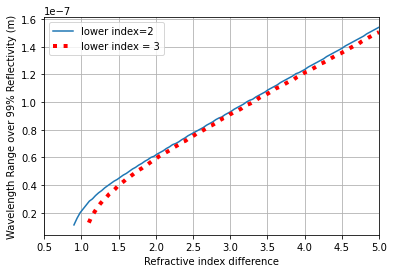

In [34]:
plt.plot(y2,low2)  
plt.plot(y3,low3, ':r', linewidth=4)

plt.xlim(0.5,5)
#plt.ylim(0.9,1)
#plt.title('')

plt.ylabel('Wavelength Range over 99% Reflectivity (m)')
plt.xlabel('Refractive index difference')

plt.grid()
plt.legend(['lower index=2','lower index = 3'])

plt.savefig('index_diff')
plt.show()

